<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Kimia Ramezan

**Student ID**:400101283





## Importing Libraries

First we import libraries that we need for this assignment.

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [187]:
X, Y = None, None

### START CODE HERE ###
data = pd.read_csv('data_logistic.csv')
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:


**Data normalization is a crucial preprocessing step in machine learning for various reasons**:

**Uniformity of Feature Scale**: Data features often vary in their scales. For example, one feature might have values between 0 and 1, while another ranges from 1000 to 10000. If not normalized, features with larger scales can disproportionately influence the model, skewing its learning process. Normalizing adjusts all feature scales to a consistent range, ensuring no single feature unduly influences the model's training.

1. **Speed of Learning**: Normalized data accelerates the convergence of training algorithms. When all features share a similar scale, gradient descent—or any optimization algorithm—can proceed more smoothly and quickly, avoiding issues like slow convergence or oscillations.

2. **Generalization of the Model**: Models trained on normalized datasets typically exhibit improved generalization, meaning they perform better on new, unseen data. This improvement occurs because normalization reduces the model's sensitivity to the scale of input features.

3. **Effective Regularization**: Many regularization methods, such as L1 and L2, presume features are equally scaled. Normalization ensures these assumptions hold true, allowing regularization to work as intended by applying penalties uniformly across all features.

**In summary**, normalizing data prior to model training enhances the training process, ensures fair feature influence, accelerates convergence, and contributes to more consistent and effective model regularization and generalization.

In [188]:
### START CODE HERE ###
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

# Return normalized data
X = X_norm
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [189]:
### START CODE HERE ###
m, n = X.shape
ones_column = np.ones((m, 1))
X_bias = np.hstack((ones_column, X))
X = X_bias
### END CODE HERE ###

print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [190]:
def sigmoid(Z):
    """
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n, m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    """
    ### START CODE HERE ###
    A = 1 / (1 + np.exp(-Z))
    return A
    ### END CODE HERE ###


### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [191]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''

    m, n = X.shape
    ### START CODE HERE ###
    y_pred = sigmoid(X @ theta)
    loss_1 = -np.mean(np.log(y_pred[y == 1]))
    loss_0 = -np.mean(np.log(1 - y_pred[y == 0]))
    loss = (np.sum(y == 1) / y.size) * loss_1 + (np.sum(y == 0) / y.size) * loss_0
    loss += regLambda / 2 * np.sum(theta**2)
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})x_{j}^{(i)} + \lambda \theta_j
$$

In [192]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''

    m, n = X.shape
    grad , y_pred = np.zeros((n,1)), sigmoid((X @ theta.reshape(-1,1)).reshape(-1,))
    ### START CODE HERE ###
    grad[0] = np.sum(y_pred - y) / len(y)
    gradient_components = []
    for indx, x_i in enumerate(X.T[1:4, :]):
        grad_component = (np.dot(y_pred - y, x_i) / X.shape[0]) + (regLambda * theta[indx + 1])
        gradient_components.append(grad_component)
    grad[1:] = np.array(gradient_components).reshape(-1, 1)
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [194]:
def fit(X, y, regLambda=0.01, alpha=0.01, epsilon=1e-3, maxNumIters=100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''

    m, n = X.shape
    theta = np.zeros((X.shape[1], 1)) 
    loss_history = []  
    epoch = 0
    while epoch < maxNumIters:
        grad = computeGradient(theta, X, y, regLambda)
        log_loss = computeCost(theta, X, y, regLambda)
        loss_history.append(log_loss)  
        new_theta = theta - alpha * grad
        if hasConverged(theta, new_theta, epsilon):
            print(f'Convergence reached at epoch {epoch}')
            break
        theta = new_theta
        
        epoch += 1
    else:
        print('Max epochs reached without convergence')

    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    return np.sqrt(np.sum((theta_new - theta_old)**2)) <= epsilon

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

Convergence reached at epoch 44


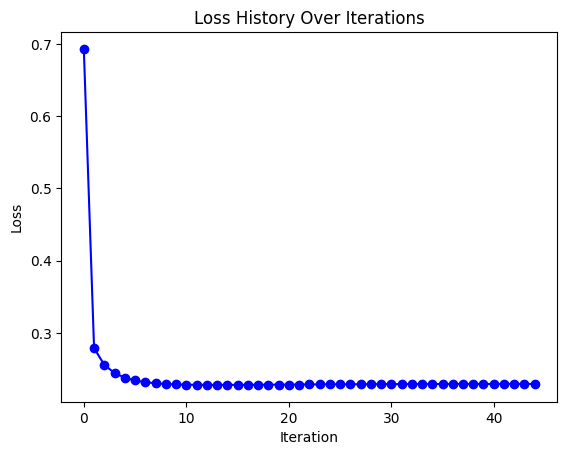

z = 1.788*x0 + -2.398*x1 + 2.551*x2 + 0.820*x3


In [195]:
theta, loss_history = fit(X, Y,0.01,5) # calculating theta and loss of each iteration

### START CODE HERE ###
x_values = range(len(loss_history))  # Generating x values
plt.plot(x_values, loss_history, marker='o', linestyle='-', color='b')  
plt.title("Loss History Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

terms = [f'{coef:.3f}*x{idx}' for idx, coef in enumerate(theta.flatten())] 
equation_str = 'z = ' + ' + '.join(terms)
print(equation_str)
### END CODE HERE ###

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [196]:
### START CODE HERE ###
X_train, X_remaining, y_train, y_remaining = train_test_split(X, Y, train_size=0.7, random_state=40)

# Splitting the remaining dataset into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, train_size=0.667, random_state=40)

# Print the shapes of the datasets
print(f'Training Set Shape: X_train: {X_train.shape}')
print(f'Validation Set Shape: X_val: {X_val.shape}')
print(f'Test Set Shape: X_test: {X_test.shape}')
### END CODE HERE ###

Training Set Shape: X_train: (7000, 4)
Validation Set Shape: X_val: (2001, 4)
Test Set Shape: X_test: (999, 4)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [197]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    linear_combination = X @ theta.reshape(-1, 1)

    # Apply the sigmoid function to the linear combination.
    probabilities = sigmoid(linear_combination.flatten())

    # Convert probabilities to binary outcomes based on a 0.5 threshold.
    binary_outcomes = (probabilities >= 0.5).astype(np.int32)

    return binary_outcomes

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

**Optimal Learning Rate and Regularization Constant**

After thorough evaluation, the optimal learning rate has been identified as `4.4`, and the best regularization constant is `0.0101`. With these parameters, the model achieves an accuracy of `81.18%` on the validation dataset and `81.93%` on the test dataset.

**Learning Rate Analysis**

The learning rate is crucial as it dictates the size of steps taken during the optimization process. It is essential for balancing the convergence speed and stability:

1. **High Learning Rate**: A larger learning rate can cause the model to converge quickly but may also lead to overshooting the optimal solution. This results in possible divergence or oscillatory behavior, which can prevent achieving the lowest possible loss.

2. **Low Learning Rate**: On the other hand, a smaller learning rate ensures smaller update steps, which can stabilize the training process. However, it may slow down convergence significantly, potentially causing the algorithm to get stuck in local minima.

**Regularization Constant Analysis**

Regularization is a technique used to prevent overfitting by adding a penalty term related to large coefficients in the loss function. The regularization constant controls the strength of this penalty:

1. **High Regularization Constant**: A higher value results in a strong penalty that drives coefficients toward zero, simplifying the model. This can prevent overfitting but might lead to underfitting if the constant is set too high.

2. **Low Regularization Constant**: A lower value leads to a weaker penalty, allowing the model to fit the training data more closely. While this can enhance performance on the training data, it increases the risk of overfitting, particularly with complex models or limited training data.

Max epochs reached without convergence
Max epochs reached without convergence
Convergence reached at epoch 571
Convergence reached at epoch 403
Convergence reached at epoch 315
Convergence reached at epoch 260
Convergence reached at epoch 223
Convergence reached at epoch 196
Convergence reached at epoch 175
Convergence reached at epoch 159
Convergence reached at epoch 145
Convergence reached at epoch 134
Convergence reached at epoch 125
Convergence reached at epoch 117
Convergence reached at epoch 110
Convergence reached at epoch 104
Convergence reached at epoch 98
Convergence reached at epoch 94
Convergence reached at epoch 89
Convergence reached at epoch 86
Convergence reached at epoch 82
Convergence reached at epoch 79
Convergence reached at epoch 76
Convergence reached at epoch 73
Convergence reached at epoch 71
Convergence reached at epoch 69
Convergence reached at epoch 67
Convergence reached at epoch 65
Convergence reached at epoch 63
Convergence reached at epoch 61
Convergence 

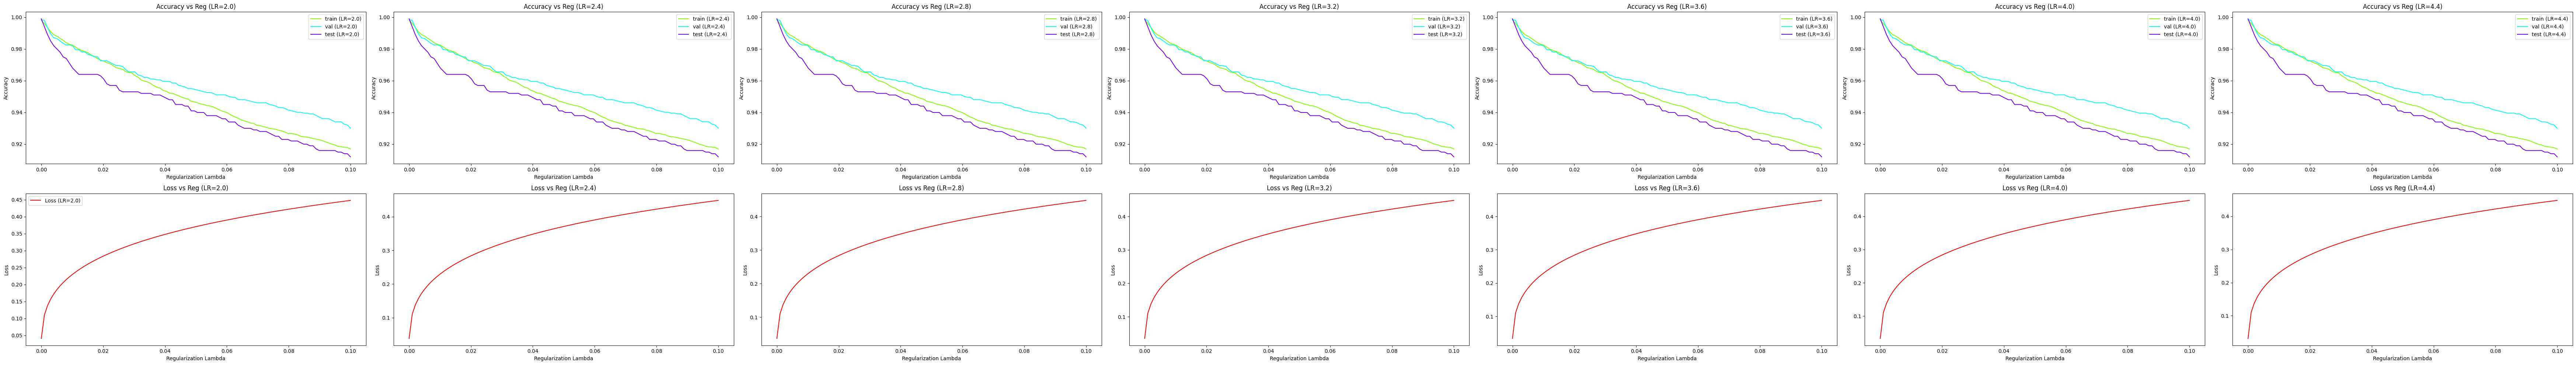

Best accuracy = 0.9985 on validation data with regularization term = 1e-07, learning rate = 4.4
Max epochs reached without convergence
Accuracy on test data = 0.9990


In [202]:

def run_experiment(lam, lr):
    theta, loss_history = fit(X_train, y_train, lam, lr, 1e-4, 1000)
    predictions = {
        'train': predict(X_train, theta),
        'val': predict(X_val, theta),
        'test': predict(X_test, theta)
    }
    accuracies = {k: np.mean(v == eval(f"y_{k}")) for k, v in predictions.items()}
    return accuracies, loss_history[-1]

def plot_accuracies_separately(lrs, acc_histories, reg_lambdas):
    for idx, lr in enumerate(lrs):
        plt.figure(figsize=(10, 5))
        colors = sns.color_palette("hsv", 3)  
        for i, key in enumerate(['train', 'val', 'test']):
            sns.lineplot(x=reg_lambdas, y=acc_histories[lr][key], label=f'{key} (LR={lr:.1f})', color=colors[i])
        plt.title(f"Accuracy vs Regularization (LR={lr:.1f})")
        plt.xlabel("Regularization Lambda")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

def plot_loss_histories(lrs, loss_histories, reg_lambdas):
    for idx, lr in enumerate(lrs):
        plt.figure(figsize=(10, 5))
        plt.plot(reg_lambdas, loss_histories[lr], label=f'Loss (LR={lr:.1f})', color='red')
        plt.title(f"Training Loss vs Regularization (LR={lr:.1f})")
        plt.xlabel("Regularization Lambda")
        plt.ylabel("Training Loss")
        plt.legend()
        plt.show()


def plot_combined(lrs, acc_histories, loss_histories, reg_lambdas):
    num_lrs = len(lrs)
    plt.figure(figsize=(num_lrs * 10, 10)) 
    for idx, lr in enumerate(lrs):
        plt.subplot(2, num_lrs, idx + 1)
        colors = sns.color_palette("hsv", 3)  
        for i, key in enumerate(['train', 'val', 'test']):
            sns.lineplot(x=reg_lambdas, y=acc_histories[lr][key], label=f'{key} (LR={lr:.1f})', color=colors[i])
        plt.title(f"Accuracy vs Reg (LR={lr:.1f})")
        plt.xlabel("Regularization Lambda")
        plt.ylabel("Accuracy")
        if idx == 0:
            plt.legend()

        # Plot Losses
        plt.subplot(2, num_lrs, num_lrs + idx + 1)
        plt.plot(reg_lambdas, loss_histories[lr], label=f'Loss (LR={lr:.1f})', color='red')
        plt.title(f"Loss vs Reg (LR={lr:.1f})")
        plt.xlabel("Regularization Lambda")
        plt.ylabel("Loss")
        if idx == 0:
            plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize parameters 
reg_lambda = np.linspace(1e-7, 0.1, 100)
learning_rates = np.linspace(2, 4.4, 7)
best_lr, best_lam, best_acc = 0, 0, 0
accuracy_histories = {lr: {'train': [], 'val': [], 'test': []} for lr in learning_rates}
loss_histories = {lr: [] for lr in learning_rates}

for lr in learning_rates:
    for lam in reg_lambda:
        accuracies, loss = run_experiment(lam, lr)
        for key in accuracy_histories[lr]:
            accuracy_histories[lr][key].append(accuracies[key])
        loss_histories[lr].append(loss)
    max_val_acc = max(accuracy_histories[lr]['val'])
    if max_val_acc >= best_acc:
        best_acc = max_val_acc
        best_lam = reg_lambda[np.argmax(accuracy_histories[lr]['val'])]
        best_lr = lr


plot_combined(learning_rates, accuracy_histories, loss_histories, reg_lambda)


# Display best results
print(f'Best accuracy = {best_acc:.4f} on validation data with regularization term = {best_lam}, learning rate = {best_lr}')
best_theta, _ = fit(X_train, y_train, best_lam, best_lr, 1e-4, 1000)
test_accuracy = np.mean(predict(X_test, best_theta) == y_test)
print(f'Accuracy on test data = {test_accuracy:.4f}')

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 
93.59%

In [211]:
### START CODE HERE ###

clf = GaussianNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of GaussianNB classifier on the test set: {accuracy:.4f}')

### END CODE HERE ###

Accuracy of GaussianNB classifier on the test set: 0.9359


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

99.50%

In [209]:
### START CODE HERE ###
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy of LinearDiscriminantAnalysis classifier on the test set: {accuracy:.4f}')
### END CODE HERE ###

Accuracy of LinearDiscriminantAnalysis classifier on the test set: 0.9950


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:

In these datasets, Logistic Regression, which has been optimized with specific learning rates and L2 regularization, and Linear Discriminant Analysis both demonstrate strong classification capabilities, achieving accuracies of 99.9% and 99.5%, respectively.